# Introduction to the FEM Module

We will implement a simple fem problem to test how the FEM module works.

In [1]:
using PyPlot, Compose
import LujiaLt.FEM
FEM = LujiaLt.FEM

LujiaLt.FEM

In [2]:
# implement a radial mesh 

# we only need to produce the point
# and let the delaunay triangulation create the elements
function Xsquare(N)
    x = linspace(-1, 1, N)
    o = ones(N)
    x, y = (x * o')[:], (o * x')[:]
    return [x'; y']
end

# create the nodes for the triangulation
Ntest = 12
X = Xsquare(Ntest)
# plot(X[1,:], X[2,:], "b.");

# we also need something that will give us the 
# interior (free) nodes
free_nodes(X) = find( maxabs(X, 2) .> 1e-10 );


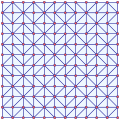

In [3]:
FEM = LujiaLt.FEM
# create a triangulation
tri = FEM.Triangulation(X)
FEM.triplot(tri; width=12cm, xradius=0.02, lwidth=0.5);

In [4]:
# check how many triangles we have
println("number of triangles = ", FEM.nT(tri))
println("we should have ", 2 * (Ntest-1)^2)
if FEM.nT(tri) == 2 * (Ntest-1)^2
    println("""=> this is great: it means that no thin triangles are 
               created on the boundary due to numerical round-off!""")
else
    println("something went wrong: please file an issue!")
end

number of triangles = 242
we should have 242
=> this is great: it means that no thin triangles are 
created on the boundary due to numerical round-off!


In [7]:
# include("../src/LujiaLt.jl"); FEM = LujiaLt.FEM

# assembly of P1-laplacian
function P1_laplacian(tri)
    # initialise triplet format
    I = Int[]; J = Int[]; V = Float64[];
    # initialise r-h-s
    F = zeros(FEM.nX(tri))
    # assembly loop
    for el in FEM.elements(tri)
        # element stiffness matrix (el.B is the gradient operator)
        Ael = vol * el.B * el.B'
        # write into global stiffness matrix
        for i = 1:3, j = 1:3
            push!(I, el.t[i]); push!(J, el.t[j]); push!(V, Ael[i,j])
        end
        # r-h-s  (force ≡ 1)
        F[el.t] = el.vol / 3
    end
end



P1_laplacian (generic function with 1 method)

In [8]:
# solve
A, b = P1_laplacian(tri)
u = zeros(FEM.nX(tri))
Ifree = free_nodes(tri.X)
u[Ifree] = A[Ifree, Ifree] \ b[Ifree]
# … and plot


LoadError: LoadError: MethodError: `start` has no method matching start(::LujiaLt.FEM.Triangulation)
while loading In[8], in expression starting on line 2

In [ ]:
PyPlot.plot_trisurf(tri.X[1,:], tri.X[2,:], 
                    triangles=tri.T'-1, 
                    cmap=ColorMap("jet"), linewidth=0.5)